In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [118]:
df = pd.read_csv("../../data/HDBPrice.csv")

In [119]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


### Data Dictionary

| Column Name         | Data Type | Description                                           | Example             |
|---------------------|-----------|-------------------------------------------------------|---------------------|
| `month`             | object    | Month of transaction (format: YYYY-MM)               | 2017-01             |
| `town`              | object    | Town where the flat is located                        | ANG MO KIO          |
| `flat_type`         | object    | Type of the flat                                      | 2 ROOM              |
| `block`             | object    | Block number                                          | 406                 |
| `street_name`       | object    | Street name                                           | ANG MO KIO AVE 10   |
| `storey_range`      | object    | Range of storey the flat is located                   | 10 TO 12            |
| `floor_area_sqm`    | float     | Floor area in square meters                          | 45.0                |
| `flat_model`        | object    | Model type of the flat                                | Improved            |
| `lease_commence_date` | int     | Year when the lease started                           | 1979                |
| `remaining_lease`   | object    | Remaining lease duration                              | 61 years 06 months  |
| `resale_price`      | float     | Resale price in SGD                                   | 232000.0            |

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203045 entries, 0 to 203044
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                203045 non-null  object 
 1   town                 203045 non-null  object 
 2   flat_type            203045 non-null  object 
 3   block                203045 non-null  object 
 4   street_name          203045 non-null  object 
 5   storey_range         203045 non-null  object 
 6   floor_area_sqm       203045 non-null  float64
 7   flat_model           203045 non-null  object 
 8   lease_commence_date  203045 non-null  int64  
 9   remaining_lease      203045 non-null  object 
 10  resale_price         203045 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.0+ MB


In [121]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,203045.000000,203045.000000,2.030450e+05
mean,96.928816,1996.248753,5.121044e+05
std,24.030476,14.190180,1.797847e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.800000e+05
50%,93.000000,1996.000000,4.800000e+05
75%,112.000000,2011.000000,6.150000e+05
max,366.700000,2021.000000,1.600000e+06


In [122]:
### check for null values
### There is no null value
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [123]:
### check for duplicate
print("there are", sum(df.duplicated()), "duplicated rows")
df[df.duplicated()].head() ## Most of duplicated rows are simply duplicated

there are 298 duplicated rows


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
510,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
591,2017-01,JURONG WEST,4 ROOM,337A,TAH CHING RD,19 TO 21,92.0,Model A,2010,92 years 03 months,470000.0
672,2017-01,PASIR RIS,4 ROOM,753,PASIR RIS ST 71,01 TO 03,105.0,Model A,1996,78 years 10 months,368000.0


In [124]:
df.drop_duplicates(inplace=True)

In [125]:
### Convert month to date type
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')

In [126]:
print("flat_type category: ", df['flat_type'].unique())
print("flat_model category: ", df['flat_model'].unique())
print("town category: ", df['town'].unique())

flat_type category:  ['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']
flat_model category:  ['Improved' 'New Generation' 'DBSS' 'Standard' 'Apartment' 'Simplified'
 'Model A' 'Premium Apartment' 'Adjoined flat' 'Model A-Maisonette'
 'Maisonette' 'Type S1' 'Type S2' 'Model A2' 'Terrace'
 'Improved-Maisonette' 'Premium Maisonette' 'Multi Generation'
 'Premium Apartment Loft' '2-room' '3Gen']
town category:  ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']


In [127]:
### 'flat_type', 'flat_model', 'town' → encode to category 
cat_cols = ['flat_type', 'flat_model', 'town']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [128]:
### remaining_lease indeed are numerical values
def extract_remaining_years(lease):
    try:
        years = int(lease.split(" years")[0])
        if "months" in lease:
            months = int(lease.split(" years")[1].split("months")[0].strip())
            return years + months / 12
        return years
    except:
        return np.nan

df['remaining_lease_years'] = df['remaining_lease'].apply(extract_remaining_years)


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202747 entries, 0 to 203044
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   month                  202747 non-null  datetime64[ns]
 1   town                   202747 non-null  category      
 2   flat_type              202747 non-null  category      
 3   block                  202747 non-null  object        
 4   street_name            202747 non-null  object        
 5   storey_range           202747 non-null  object        
 6   floor_area_sqm         202747 non-null  float64       
 7   flat_model             202747 non-null  category      
 8   lease_commence_date    202747 non-null  int64         
 9   remaining_lease        202747 non-null  object        
 10  resale_price           202747 non-null  float64       
 11  remaining_lease_years  202747 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(3), in

### Data Validation
- We first check if remaining lease and lease commence date are in accordance
- It's possible that the remaining lease years are substantially large if inappropriately recorded. (This took the same effect as a extreme early lease commence date)
- For resale price and floor_area_sqm, we look for values that are extremely small

In [130]:
df['transaction_year'] = df['month'].dt.year
df['computed_remaining_lease'] = 99 - (df['transaction_year'] - df['lease_commence_date'])
df['lease_difference'] = df['remaining_lease_years'] - df['computed_remaining_lease']
print("average difference:", df['lease_difference'].mean())
print("standard deviation of difference:", df['lease_difference'].std())
print("difference larger than 1 year:", (df['lease_difference'].abs() > 1).sum())

average difference: 0.03225119648297329
standard deviation of difference: 0.40880687097626667
difference larger than 1 year: 4


In [131]:
problem_cases = df[df['lease_difference'].abs() > 2]
problem_cases[['month', 'lease_commence_date', 'remaining_lease_years', 'computed_remaining_lease', 'lease_difference']]

,month,lease_commence_date,remaining_lease_years,computed_remaining_lease,lease_difference
199288,2025-01-01,1981,40.0,55,-15.0


#### Lease Logic Consistency Check

To validate the internal consistency between `lease_commence_date`, `transaction year`, and `remaining_lease`, we applied the following logic:

> Expected remaining lease = 99 - (transaction_year - lease_commence_date)

Among 200,000+ records, only 4 entries showed a difference >2 years.  
After manual inspection, these records appear to be old flats or lease-adjusted properties, where the deviation is likely valid.

Thus, no imputation or deletion was applied for these entries.


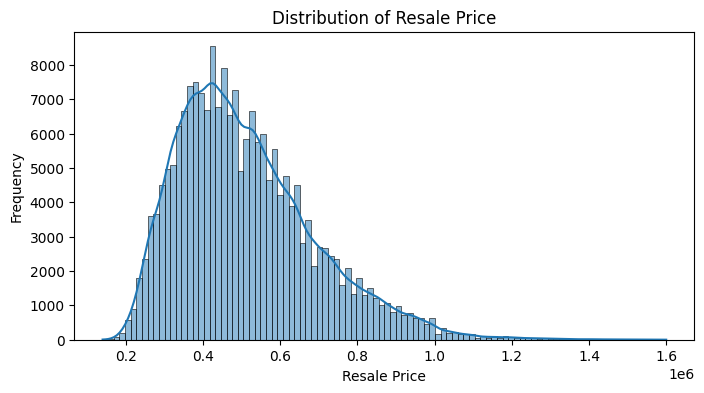

In [132]:
# 1. Resale Price
plt.figure(figsize=(8, 4))
sns.histplot(df['resale_price'], bins=100, kde=True)
plt.title("Distribution of Resale Price")
plt.xlabel("Resale Price")
plt.ylabel("Frequency")
plt.show()


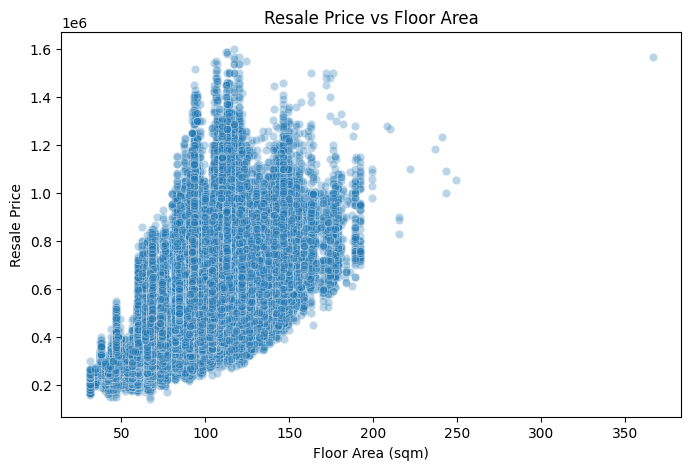

In [133]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='floor_area_sqm', y='resale_price', alpha=0.3)
plt.title('Resale Price vs Floor Area')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.show()


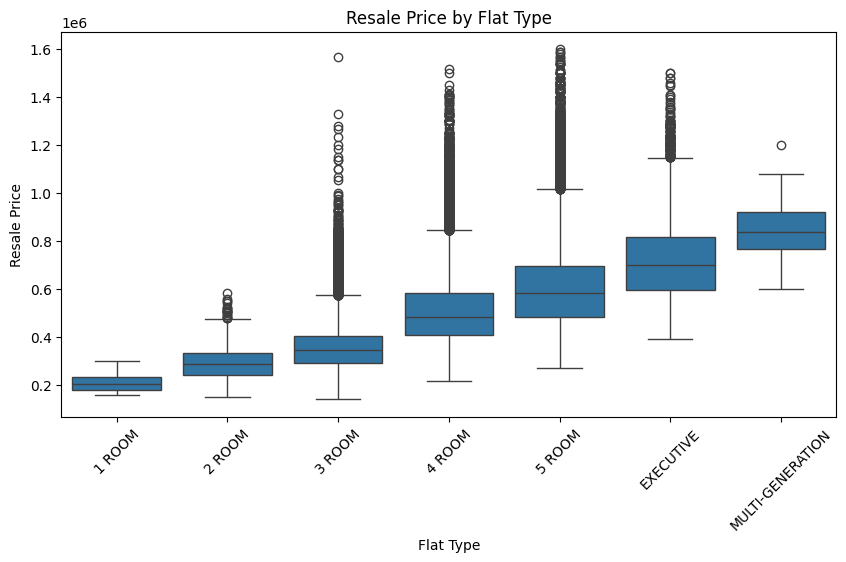

In [134]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='flat_type', y='resale_price')
plt.xticks(rotation=45)
plt.title('Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.show()


In [135]:
three_room_outlier = df[df['flat_type'] == '3 ROOM'].sort_values(by='resale_price', ascending=False).head(1)
multi_gen_outlier = df[df['flat_type'] == 'MULTI-GENERATION'].sort_values(by='resale_price', ascending=False).head(1)
outliers = pd.concat([three_room_outlier, multi_gen_outlier])
outliers[['month', 'town', 'flat_type', 'floor_area_sqm', 'resale_price', 'block', 'street_name']]


,month,town,flat_type,floor_area_sqm,resale_price,block,street_name
182475,2024-07-01,KALLANG/WHAMPOA,3 ROOM,366.7,1568000.0,53,JLN MA'MOR
196983,2024-03-01,YISHUN,MULTI-GENERATION,164.0,1200000.0,666,YISHUN AVE 4


#### Outlier Interpretation

While statistical outliers were detected via boxplots and IQR methods, a deeper review reveals that not all should be excluded.

For example, a 3 ROOM flat in KALLANG/WHAMPOA recorded a resale price of \$1.568M with an unusually large floor area (366.7 sqm).  
This case is best interpreted as a high leverage point due to rare unit structure rather than a faulty outlier. Therefore, a scaling is required for feature engineering before modelling to avoid its dominant influence.
Another high-value transaction in a MULTI-GENERATION flat in YISHUN was retained, as its price and area fell within reasonable limits for this flat type.


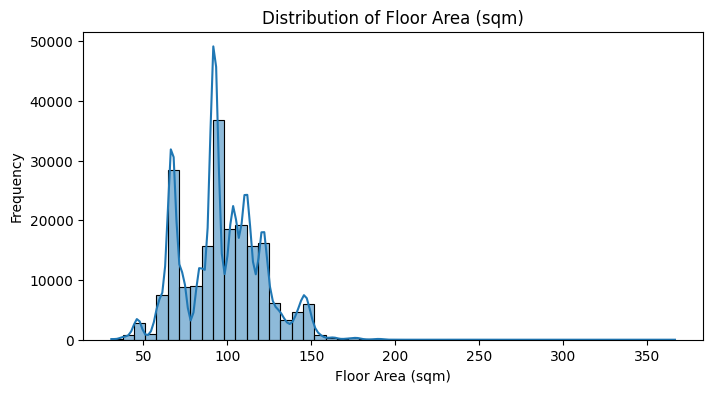

In [136]:
# 2. Floor Area
plt.figure(figsize=(8, 4))
sns.histplot(df['floor_area_sqm'], bins=50, kde=True)
plt.title("Distribution of Floor Area (sqm)")
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Frequency")
plt.show()


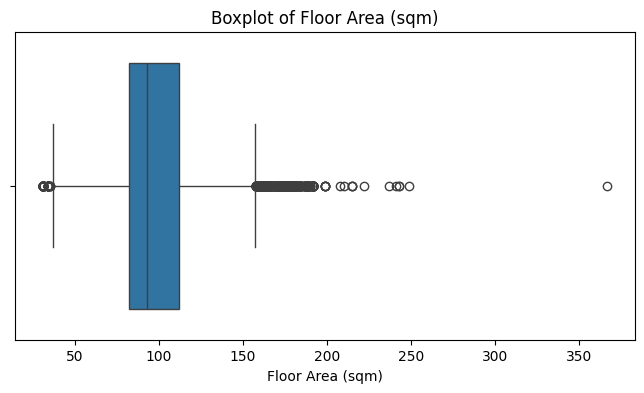

In [137]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['floor_area_sqm'])
plt.title("Boxplot of Floor Area (sqm)")
plt.xlabel("Floor Area (sqm)")
plt.show()

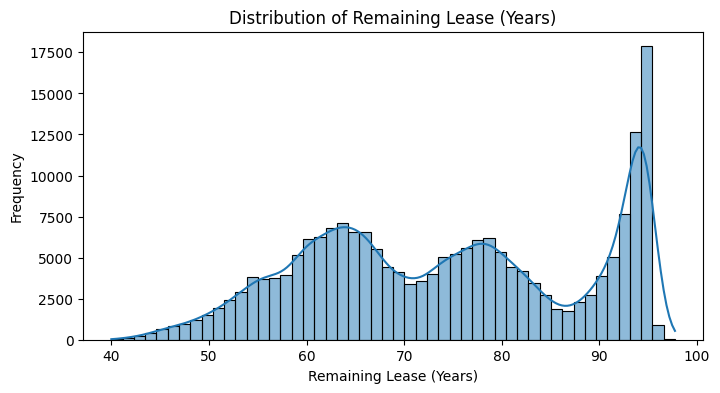

In [138]:
# 3. Remaining Lease
plt.figure(figsize=(8, 4))
sns.histplot(df['remaining_lease_years'], bins=50, kde=True)
plt.title("Distribution of Remaining Lease (Years)")
plt.xlabel("Remaining Lease (Years)")
plt.ylabel("Frequency")
plt.show()


#### Floor Area Validation

The distribution of `floor_area_sqm` shows a strong central tendency around 90–120 sqm, with a long right tail.  
No apparent errors were found, but one record with a floor area of 366.7 sqm under `3 ROOM` was flagged as a high leverage point.

As this record is valid and not due to data entry error, we retain it for now.  
Appropriate transformation (e.g., scaling or log) will be applied during the feature engineering stage to mitigate its disproportionate influence.


In [139]:
print(df['resale_price'].describe())
print(df['floor_area_sqm'].describe())
print(df['remaining_lease_years'].describe())

count    2.027470e+05
mean     5.121627e+05
std      1.798566e+05
min      1.400000e+05
25%      3.800000e+05
50%      4.800000e+05
75%      6.150000e+05
max      1.600000e+06
Name: resale_price, dtype: float64
count    202747.000000
mean         96.932490
std          24.036978
min          31.000000
25%          82.000000
50%          93.000000
75%         112.000000
max         366.700000
Name: floor_area_sqm, dtype: float64
count    202747.000000
mean         74.413470
std          14.108872
min          40.000000
25%          62.750000
50%          74.250000
75%          88.583333
max          97.750000
Name: remaining_lease_years, dtype: float64


#### Remaining Lease Validation

The `remaining_lease_years` field reflects the number of years left on each property's 99-year lease.  
All values fall within a valid range (40–99 years), with no observed data entry anomalies (e.g., >99 years).

The multimodal distribution suggests distinct construction eras of HDB flats, and no removal or correction was necessary.


## Exploratory Data Analysis


**Recall Three Questions in the Project Requirement**
- How much did the property prices increase in recent years?
- What property characteristics/amenities affect the increase?
- What kind of property can you predict the recent price most accurately?

To visualize the increase of property prices, we shall determine it based on the category of different flat_type, flat_model, and floor area_sqm. However, the fundamental interpretation of the increase of property prices shall be determined through modelling

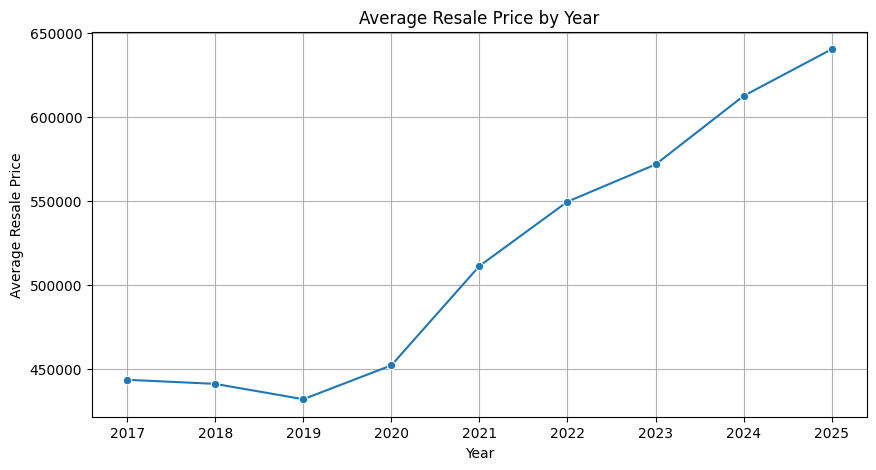

In [140]:
### Group by year
price_by_year = df.groupby('transaction_year')['resale_price'].mean().reset_index()

### Plot time vs resale price
plt.figure(figsize=(10, 5))
sns.lineplot(data=price_by_year, x='transaction_year', y='resale_price', marker='o')
plt.title('Average Resale Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.grid(True)
plt.show()


#### Price Trend Analysis (2017–2025)

Average resale prices remained relatively flat between 2017 and 2019, hovering around \$440,000.  
However, beginning in 2020, prices began to climb steadily—despite the COVID-19 pandemic.  
By 2025, the average resale price had reached approximately \$640,000, reflecting a nearly 45% increase from the 2019 low.

This upward trend indicates structural changes in housing demand and supply, possibly driven by lifestyle shifts, delayed construction, and increased reliance on public housing.


**To further investigate the housing price increasing, we tried to investigate the relationship between price and town, price and flat type. Besides, we also want to see how flat type changes within each town.**

C:\Users\13081\AppData\Local\Temp\ipykernel_16524\1652276468.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_yearly_price = df.groupby(['transaction_year', 'flat_type'])['resale_price'].mean().reset_index()


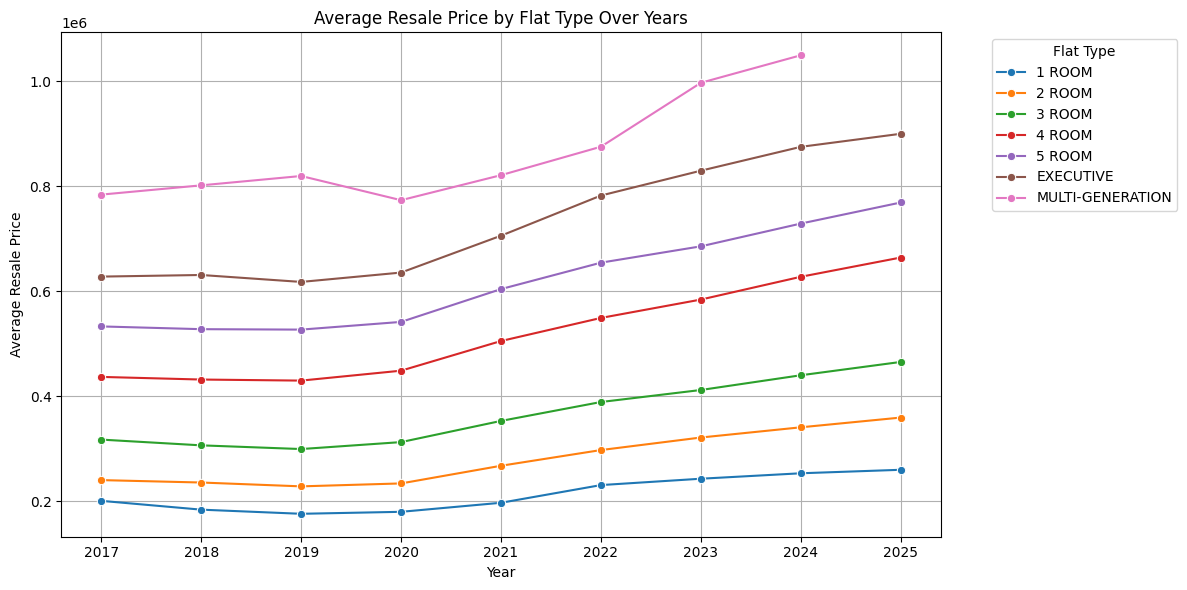

In [141]:
### group by 
type_yearly_price = df.groupby(['transaction_year', 'flat_type'])['resale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=type_yearly_price, x='transaction_year', y='resale_price', hue='flat_type', marker='o')
plt.title('Average Resale Price by Flat Type Over Years')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.legend(title='Flat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Trend Analysis by Flat Type

Across all flat types, we observe a consistent increase in average resale price from 2017 to 2025. The rate of increase is more pronounced after 2020, which aligns with the broader market boom observed in earlier EDA.

Notable observations include:
- **Multi-Generation flats** experienced a slight dip in resale price around 2019–2020, followed by a sharp increase between 2021–2024.
- In **2025**, the resale price of Multi-Generation flats appears to plateau or even drop slightly, potentially due to market saturation or reduced transaction volume (as suggested by fewer data entries).
- Other flat types (1 ROOM to EXECUTIVE) exhibit smooth and steady price increases without drastic fluctuations, suggesting healthy market demand across most categories.

These trends imply that flat type is a reliable predictor of resale price, though market conditions and flat availability can still introduce variations.


In [142]:
flat_model_map = {
    'Standard': 'Basic',
    'Improved': 'Basic',
    'Simplified': 'Basic',
    'New Generation': 'Basic',
    
    'Model A': 'Model A',
    'Model A-Maisonette': 'Model A',
    'Model A2': 'Model A',
    
    'Maisonette': 'Maisonette',
    'Improved-Maisonette': 'Maisonette',
    'Premium Maisonette': 'Maisonette',
    
    'Premium Apartment': 'Premium',
    'Premium Apartment Loft': 'Premium',
    'DBSS': 'Premium',
    
    'Terrace': 'Special',
    'Type S1': 'Special',
    'Type S2': 'Special',
    '3Gen': 'Special',
    'Adjoined flat': 'Special',
    'Multi Generation': 'Special',
    
    'Apartment': 'Other',
    '2-room': 'Other',
    '3Gen': 'Other'
}
df['flat_model_group'] = df['flat_model'].map(flat_model_map).fillna('Other')


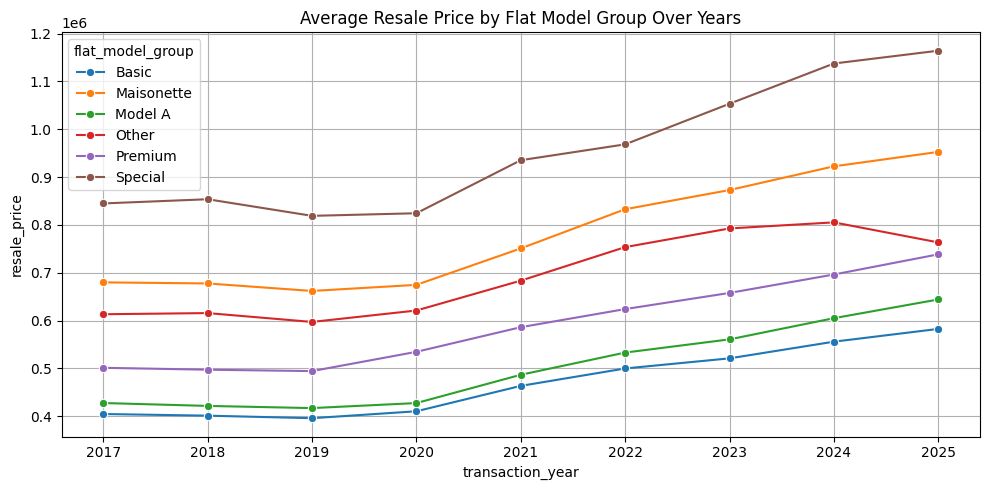

In [143]:
grouped_trend = df.groupby(['transaction_year', 'flat_model_group'])['resale_price'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_trend, x='transaction_year', y='resale_price', hue='flat_model_group', marker='o')
plt.title('Average Resale Price by Flat Model Group Over Years')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\13081\AppData\Local\Temp\ipykernel_16524\1875886584.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  other_trend = other_df.groupby(['transaction_year', 'flat_model'])['resale_price'].mean().reset_index()


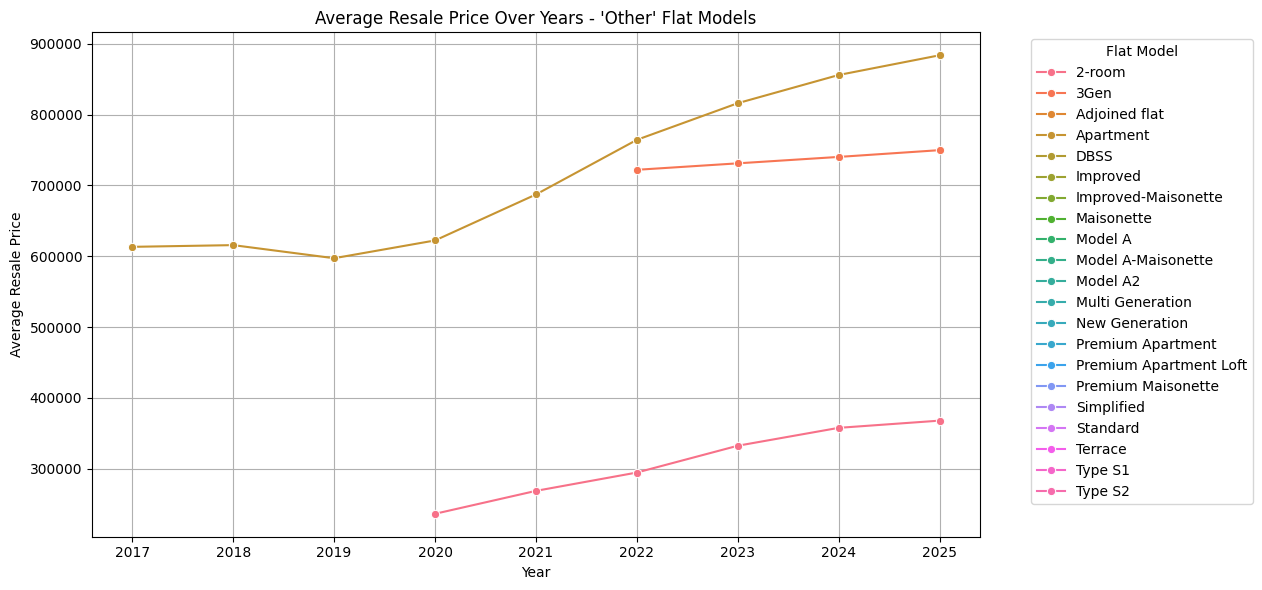

In [144]:
other_df = df[df['flat_model_group'] == 'Other']

other_trend = other_df.groupby(['transaction_year', 'flat_model'])['resale_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=other_trend, x='transaction_year', y='resale_price', hue='flat_model', marker='o')
plt.title("Average Resale Price Over Years - 'Other' Flat Models")
plt.xlabel("Year")
plt.ylabel("Average Resale Price")
plt.grid(True)
plt.tight_layout()
plt.legend(title='Flat Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Deep Dive: 'Other' Flat Model Group

Upon further breakdown of the `Other` flat model group, we found that the significant increase in average resale price after 2020 was primarily driven by a few high-value flat models, particularly `Apartment` and `3Gen`.

- **Apartment** units show a steady and substantial price increase from ~600k to almost 900k between 2017 and 2025.
- **3Gen** models also maintain relatively high prices above 700k, with a mild upward trend.
- In contrast, models like **Type S2** remain at much lower price points (~230k to 370k), pulling down the group's overall average.

This indicates that while `Other` seems to behave inconsistently as a group, the internal composition is heterogeneous. High-value rare units skew the mean upward, whereas low-cost units introduce variance.

We recommend treating these influential sub-models (`Apartment`, `3Gen`) as key drivers in model design, potentially separating them from generic 'Other' classification if modeling precision is desired.


In [145]:
region_map = {
    # Central
    'BISHAN': 'Central',
    'TOA PAYOH': 'Central',
    'CENTRAL AREA': 'Central',
    'KALLANG/WHAMPOA': 'Central',
    'MARINE PARADE': 'Central',
    'QUEENSTOWN': 'Central',
    'BUKIT MERAH': 'Central',
    'GEYLANG': 'Central',

    # North
    'SEMBAWANG': 'North',
    'WOODLANDS': 'North',
    'YISHUN': 'North',

    # North-East
    'ANG MO KIO': 'North-East',
    'HOUGANG': 'North-East',
    'PUNGGOL': 'North-East',
    'SENGKANG': 'North-East',
    'SERANGOON': 'North-East',
    'SELETAR': 'North-East',

    # East
    'BEDOK': 'East',
    'PASIR RIS': 'East',
    'TAMPINES': 'East',

    # West
    'BUKIT BATOK': 'West',
    'BUKIT PANJANG': 'West',
    'CHOA CHU KANG': 'West',
    'CLEMENTI': 'West',
    'JURONG EAST': 'West',
    'JURONG WEST': 'West',
    'BUKIT TIMAH': 'West',
    'LIM CHU KANG': 'West'
}


df['region'] = df['town'].map(region_map)


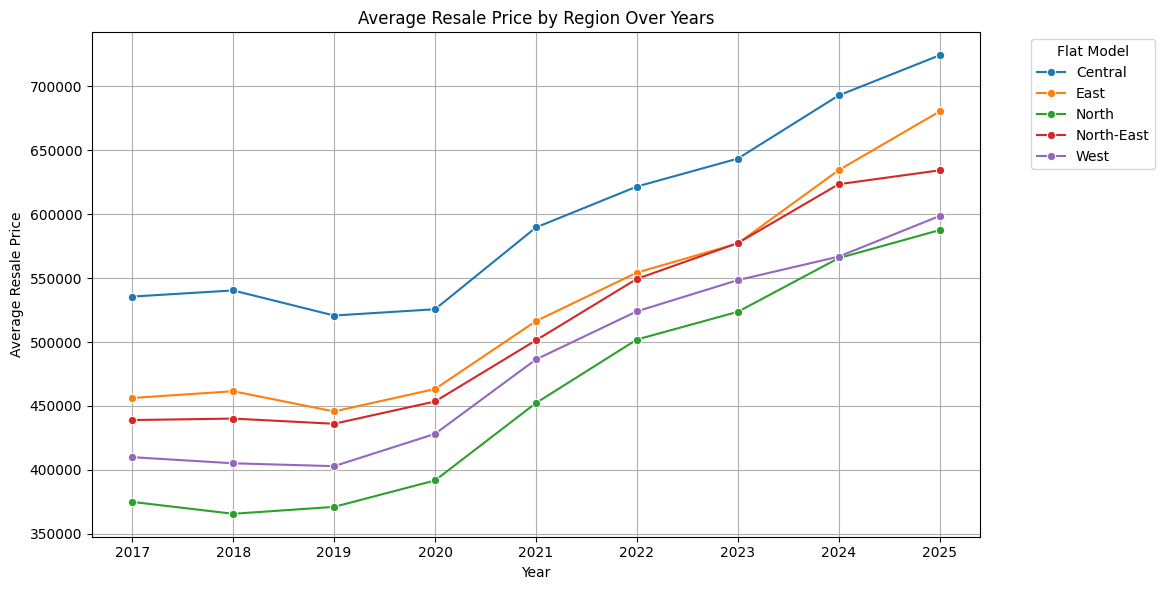

In [146]:
### Group by
price_by_region = df.groupby(['transaction_year', 'region'])['resale_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=price_by_region, x='transaction_year', y='resale_price', hue='region', marker='o')
plt.title("Average Resale Price by Region Over Years")
plt.xlabel("Year")
plt.ylabel("Average Resale Price")
plt.grid(True)
plt.tight_layout()
plt.legend(title='Flat Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Average Resale Price by Region Over Years

To examine whether the increase in resale price is consistent across different geographic regions, we grouped the towns into **five major regions** of Singapore:
- **Central**
- **East**
- **North**
- **North-East**
- **West**

We then plotted the average resale price over time for each region.

#### Observations:
- **All regions experienced a steady increase in average resale price** from 2020 onwards, especially during the post-COVID period.
- **Central region** consistently recorded the **highest resale prices**, indicating its long-standing appeal and demand.
- **East region** witnessed a **significant rise between 2022–2025**, suggesting potential urban development or infrastructure enhancement.
- **North and West regions**, while starting at lower price points, showed **strong upward trends**, reflecting increased affordability demand or improved accessibility.
- **North-East** maintained a **stable and moderate trajectory**, staying between the other regions.

#### Interpretation:
This suggests that **location is a key factor influencing HDB resale prices**. Even though the overall price trend is upward, the **rate and magnitude** of price increases **vary by region**, which supports the idea that geographic segmentation should be considered when modeling or predicting prices.

This trend also justifies the inclusion of `town` or `region` as **important categorical features** in the modeling phase.


In [155]:
df[['region','flat_model_group']] = df[['region','flat_model_group']].astype('category')

#### Statistical Analysis



#### Model Selection Strategy

To address the three guiding questions of this project, we employ a combination of explanatory and predictive models:

- **Linear Regression**: To interpret the effect of key variables via coefficients.
- **Decision Tree Regressor**: To identify the most influential features in a non-parametric setting.
- **Random Forest Regressor**: To maximize predictive accuracy for identifying the best type of property for price prediction.
- **Spline Regression**
- **XGBoost**

We avoid classification-based models, as the task is entirely regression-oriented.


### Feature Engineering

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202747 entries, 0 to 203044
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   month                  202747 non-null  datetime64[ns]
 1   town                   202747 non-null  category      
 2   flat_type              202747 non-null  category      
 3   block                  202747 non-null  object        
 4   street_name            202747 non-null  object        
 5   storey_range           202747 non-null  object        
 6   floor_area_sqm         202747 non-null  float64       
 7   flat_model             202747 non-null  category      
 8   lease_commence_date    202747 non-null  int64         
 9   remaining_lease        202747 non-null  object        
 10  resale_price           202747 non-null  float64       
 11  remaining_lease_years  202747 non-null  float64       
 12  transaction_year       202747 non-null  int32    

In [ ]:
unused_columns = ['computed_remaining_lease', 'lease_difference']
df.drop(unused_columns, axis=1, inplace=True)